# ML with CSV data

## Extras

In [ ]:
# .apply() to use your method
df['col_name'].apply(method_name)

In [ ]:
# remove extreme values (min and max values) of a col
# outlier removal

def remove_col_outliers(df):     #pass entire df as param
  df_out=pd.DataFrame()
  for key , i in df.groupby('location'):
    m=np.mean(i['price_per_sqft'])
    sd=np.std(i['price_per_sqft'])

    reduced_df=i[(i['price_per_sqft']>(m-sd)) & (i['price_per_sqft']<=(m+sd))]
    df_out=pd.concat([df_out, reduced_df], ignore_index=True)

  return df_out

df6=remove_col_outliers(df5)

In [ ]:
#plot a graph  and visualize if for same value a lower value has higher price
# takes df and col as input


def plot_scatter(df, col_value):
  bhk2=df[(df['bhk']==2) & (df['location']==col_value)]
  bhk3=df[(df['bhk']==3) & (df['location']==col_value)]
  plt.scatter(bhk2['total_sqft'], bhk2['price'], color='blue', label='2 BHK', s=50)
  plt.scatter(bhk3['total_sqft'], bhk3['price'], color='green', label='3 BHK', s=50)
  plt.xlabel('Total Square Feet Area')
  plt.ylabel('Price')
  plt.title(col_value)
  plt.legend()
  plt.show()



plot_scatter(df6, 'Rajaji Nagar')

## Data Cleaning

In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/Datasets/bengaluru_house_prices.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [ ]:
# gives no. of rows and cols
df.shape


(13320, 9)

In [ ]:
df1=df.drop(['availability', 'society', 'balcony'], axis='columns')

In [ ]:
#group contents of a col
df.groupby('area_type')['area_type'].agg('count')

,area_type
area_type,
Built-up Area,2418
Carpet Area,87
Plot Area,2025
Super built-up Area,8790


In [ ]:
# check null values

df.isnull().sum()

,0
area_type,0
availability,0
location,1
size,16
society,5502
total_sqft,0
bath,73
balcony,609
price,0


In [ ]:
# drop rows with null values

df9=df.dropna()




df9.isnull().sum()

,0
area_type,0
availability,0
location,0
size,0
society,0
total_sqft,0
bath,0
balcony,0
price,0


In [ ]:
# get unique values of a col

df1['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [ ]:
# we can see above 2 BHK and 2 Bedroom are same but still are not unique

# transformation

df2=df1.dropna()

df2['bhk']=df2['size'].apply(lambda x: int(x.split(' ')[0]))


df2.head()

<ipython-input-51-e88ebc839b20>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bhk']=df2['size'].apply(lambda x: int(x.split(' ')[0]))


,area_type,location,size,total_sqft,bath,price,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,51.00,2


In [ ]:
df2['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [ ]:
df2[df2['bhk']>=19]

,area_type,location,size,total_sqft,bath,price,bhk
1718,Super built-up Area,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
3379,Super built-up Area,1Hanuman Nagar,19 BHK,2000,16.0,490.0,19
4684,Plot Area,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [ ]:
# we can see above, the flat with 43 bhk is cheaper than 27 bhk. so remove these

In [ ]:
df2['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [ ]:
# 1133 - 1384....these needs to be converted to mean value



def is_float(x):
  try:
    float(x)
  except:
    return False
  return True

# find out all val that are represented as a range. (eg: 1133 - 1384.)
df2[~df2['total_sqft'].apply(is_float)].head(10)

,area_type,location,size,total_sqft,bath,price,bhk
30,Super built-up Area,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Super built-up Area,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,Super built-up Area,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Super built-up Area,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,Super built-up Area,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Super built-up Area,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Super built-up Area,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Built-up Area,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Super built-up Area,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Built-up Area,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [ ]:
def convert_sqft_to_num(x):
  tokens=x.split('-')
  if len(tokens)==2:
    return (float(tokens[0])+float(tokens[1]))/2
  try:
    return float(x)
  except:
    return


df2['total_sqft']=df2['total_sqft'].apply(convert_sqft_to_num)
df2.head()

<ipython-input-57-981d4548878f>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['total_sqft']=df2['total_sqft'].apply(convert_sqft_to_num)


,area_type,location,size,total_sqft,bath,price,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [ ]:
df2['total_sqft'].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

## Data Transofrmation | Dimensionality reduction | Feature engineering

In [ ]:


df3=df2.copy()

df3.head()

,area_type,location,size,total_sqft,bath,price,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [ ]:
# new col 'price_per_sqft


df3['price_per_sqft']=df3['price']*100000/df3['total_sqft']

df3.head()

,area_type,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [ ]:
#
#check no. locations

df3['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [ ]:
len(df3['location'].unique())

1304

In [ ]:
# It is very difficult to handle such large no. of unique values and that too categorical values


# to handle this make observation of most & least repeated value

In [ ]:
group_location = df3.groupby('location')['location'].agg('count')

group_location.sort_values(ascending=False)



,location
location,
Whitefield,534
Sarjapur Road,392
Electronic City,302
Kanakpura Road,266
Thanisandra,233
...,...
Banaswadi,1
Kanakadasa Layout,1
Kanakapur main road,1


In [ ]:
# now all location with count less than 10 can be considered as 'other' value

location_less_than_10 = group_location[group_location<=10]

location_less_than_10

,location
location,
Anekal,1
Banaswadi,1
Basavangudi,1
Bhoganhalli,1
Devarabeesana Halli,6
...,...
t.c palya,1
tc.palya,4
vinayakanagar,1


In [ ]:
df3['location'] = df3['location'].apply(lambda x: 'other' if x in location_less_than_10 else x)



## Outlier remover

In [ ]:
# oulier removal is done by observing each col one by one

In [ ]:
df4=df3.copy()
df4.head()

,area_type,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [ ]:
# typically each room is around minimum of 300sqft
# so find all rows

df4[df4['total_sqft']/df4['bhk']<300]

,area_type,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,Plot Area,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,Plot Area,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Plot Area,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Plot Area,other,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,Plot Area,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...,...,...
13277,Plot Area,other,7 Bedroom,1400.0,7.0,218.0,7,15571.428571
13279,Plot Area,other,6 Bedroom,1200.0,5.0,130.0,6,10833.333333
13281,Plot Area,Margondanahalli,5 Bedroom,1375.0,5.0,125.0,5,9090.909091
13303,Plot Area,Vidyaranyapura,5 Bedroom,774.0,5.0,70.0,5,9043.927649


In [ ]:
df4.shape

(13246, 8)

In [ ]:
# now in new df keep all good values and drop above rows


df5=df4[~(df4['total_sqft']/df4['bhk']<300)]

df5.head()

,area_type,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [ ]:
df5.shape

(12502, 8)

In [ ]:
int((df4.shape )[0])-int((df5.shape)[0])

744

In [ ]:
# 744 bad rows are removed

In [ ]:
# now consider price_per_sqft col

df5.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,12456.000000,12502.000000,12502.000000,12502.000000,12456.000000
mean,1590.189927,2.564790,111.311915,2.650696,6308.502826
std,1260.404795,1.084946,152.089966,0.981698,4168.127339
min,300.000000,1.000000,9.000000,1.000000,267.829813
25%,1115.000000,2.000000,49.000000,2.000000,4210.526316
50%,1300.000000,2.000000,70.000000,3.000000,5294.117647
75%,1700.000000,3.000000,115.000000,3.000000,6916.666667
max,52272.000000,16.000000,3600.000000,16.000000,176470.588235


In [ ]:
# we can see price per sqft min is 267 which is impossible in banglore and max is 176470
# remove extreme ends
import numpy as np



def remove_col_outliers(df):     #pass entire df as param
  df_out=pd.DataFrame()
  for key , i in df.groupby('location'):
    m=np.mean(i['price_per_sqft'])
    sd=np.std(i['price_per_sqft'])

    reduced_df=i[(i['price_per_sqft']>(m-sd)) & (i['price_per_sqft']<=(m+sd))]
    df_out=pd.concat([df_out, reduced_df], ignore_index=True)

  return df_out

df6=remove_col_outliers(df5)

df6.describe()


,total_sqft,bath,price,bhk,price_per_sqft
count,10244.000000,10244.000000,10244.000000,10244.000000,10244.000000
mean,1503.662115,2.473741,90.968580,2.571847,5657.802131
std,876.694693,0.981421,86.139083,0.896375,2266.273845
min,300.000000,1.000000,10.000000,1.000000,1250.000000
25%,1108.000000,2.000000,49.000000,2.000000,4244.178277
50%,1282.000000,2.000000,67.000000,2.000000,5172.846776
75%,1650.000000,3.000000,100.000000,3.000000,6426.419630
max,30400.000000,16.000000,2200.000000,16.000000,24509.803922


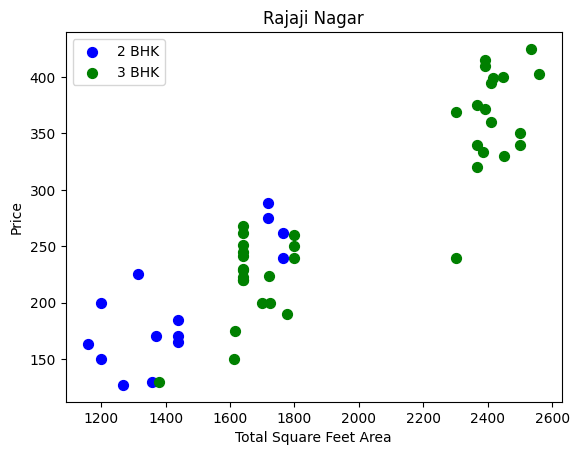

In [ ]:
# plot and visualize

import matplotlib.pyplot as plt

def plot_scatter(df, col_value):
  bhk2=df[(df['bhk']==2) & (df['location']==col_value)]
  bhk3=df[(df['bhk']==3) & (df['location']==col_value)]
  plt.scatter(bhk2['total_sqft'], bhk2['price'], color='blue', label='2 BHK', s=50)
  plt.scatter(bhk3['total_sqft'], bhk3['price'], color='green', label='3 BHK', s=50)
  plt.xlabel('Total Square Feet Area')
  plt.ylabel('Price')
  plt.title(col_value)
  plt.legend()
  plt.show()



plot_scatter(df6, 'Rajaji Nagar')


In [ ]:
# we can see few 2bhk have higher price than 3bhk for same sqft

# at 1700 total sqft area, 2bhk has higher price than 3bhk

# need to remove

In [ ]:
#remove such values

def remove_bhk_outliers(df):
  exclude_indices=np.array([])
  for location, location_df in df.groupby('location'):
    bhk_stats={}
    for bhk, bhk_df in location_df.groupby('bhk'):
      bhk_stats[bhk]={
          'mean': np.mean(bhk_df['price_per_sqft']),
          'std': np.std(bhk_df['price_per_sqft']),
          'count': bhk_df.shape[0]
      }
    for bhk, bhk_df in location_df.groupby('bhk'):
      stats=bhk_stats.get(bhk-1)
      if stats and stats['count']>5:
        exclude_indices=np.append(exclude_indices, bhk_df[bhk_df['price_per_sqft']<(stats['mean'])].index.values)

  return df.drop(exclude_indices, axis='index')


df7=remove_bhk_outliers(df6)
df7

,area_type,location,size,total_sqft,bath,price,bhk,price_per_sqft
1,Super built-up Area,Devarachikkanahalli,2 BHK,1250.0,2.0,40.0,2,3200.000000
2,Plot Area,Devarachikkanahalli,2 Bedroom,1200.0,2.0,83.0,2,6916.666667
3,Super built-up Area,Devarachikkanahalli,2 BHK,1170.0,2.0,40.0,2,3418.803419
4,Super built-up Area,Devarachikkanahalli,3 BHK,1425.0,2.0,65.0,3,4561.403509
5,Super built-up Area,Devarachikkanahalli,2 BHK,947.0,2.0,43.0,2,4540.654699
...,...,...,...,...,...,...,...,...
10235,Carpet Area,other,2 BHK,1200.0,2.0,70.0,2,5833.333333
10236,Super built-up Area,other,1 BHK,1800.0,1.0,200.0,1,11111.111111
10239,Super built-up Area,other,2 BHK,1353.0,2.0,110.0,2,8130.081301
10240,Plot Area,other,1 Bedroom,812.0,1.0,26.0,1,3201.970443


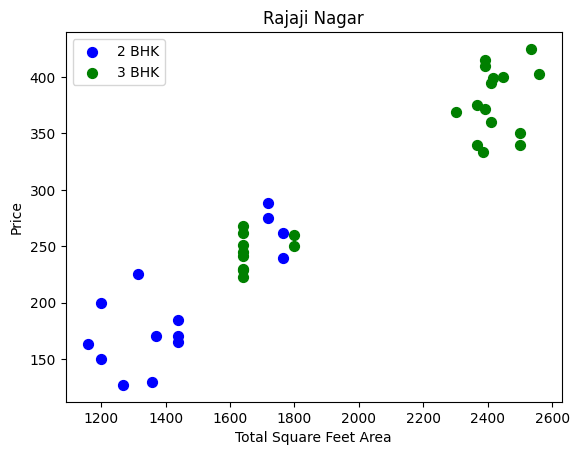

In [ ]:
plot_scatter(df7, 'Rajaji Nagar')

In [ ]:
# issue solved

## Model building

In [ ]:
df10=df6.copy()
df10.head()

,area_type,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Super built-up Area,Devarachikkanahalli,3 BHK,1250.0,2.0,44.0,3,3520.000000
1,Super built-up Area,Devarachikkanahalli,2 BHK,1250.0,2.0,40.0,2,3200.000000
2,Plot Area,Devarachikkanahalli,2 Bedroom,1200.0,2.0,83.0,2,6916.666667
3,Super built-up Area,Devarachikkanahalli,2 BHK,1170.0,2.0,40.0,2,3418.803419
4,Super built-up Area,Devarachikkanahalli,3 BHK,1425.0,2.0,65.0,3,4561.403509


In [ ]:
df10=df10.drop(['area_type', 'size', 'price_per_sqft'], axis='columns')
df10.head()

,location,total_sqft,bath,price,bhk
0,Devarachikkanahalli,1250.0,2.0,44.0,3
1,Devarachikkanahalli,1250.0,2.0,40.0,2
2,Devarachikkanahalli,1200.0,2.0,83.0,2
3,Devarachikkanahalli,1170.0,2.0,40.0,2
4,Devarachikkanahalli,1425.0,2.0,65.0,3


In [ ]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

df10['location']=le.fit_transform(df10['location'])
df10.head(20)

,location,total_sqft,bath,price,bhk
0,0,1250.0,2.0,44.0,3
1,0,1250.0,2.0,40.0,2
2,0,1200.0,2.0,83.0,2
3,0,1170.0,2.0,40.0,2
4,0,1425.0,2.0,65.0,3
5,0,947.0,2.0,43.0,2
6,0,1130.0,2.0,36.0,2
7,0,1417.0,2.0,76.0,3
8,0,1230.0,2.0,58.0,2
9,0,1705.0,3.0,75.0,3


In [ ]:
X=df10.drop('price',axis='columns')
y=df10['price']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)



In [ ]:
# do gridSearch, crossvalidation,etc and find a good model

# maybe random for was the best model

from sklearn.ensemble import RandomForestRegressor

model=RandomForestRegressor(n_estimators=10)

model.fit(X_train, y_train)

model.score(X_test, y_test)

0.6815917780338754

In [ ]:
model.predict([[5,3000,3,3]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([342.4])

## Flask server

In [ ]:
https://www.youtube.com/watch?v=Q5JyawS8f5Q&list=PLeo1K3hjS3uvCeTYTeyfe0-rN5r8zn9rw&index=28

## Deploy in AWS

In [ ]:
https://www.youtube.com/watch?v=q8NOmLD5pTU&list=PLeo1K3hjS3uvCeTYTeyfe0-rN5r8zn9rw&index=30

SyntaxError: invalid syntax (<ipython-input-1-5c6f91b3ae47>, line 1)

# ML Image Classification

https://www.youtube.com/watch?v=kwKfWBb6frs&list=PLeo1K3hjS3uvCeTYTeyfe0-rN5r8zn9rw&index=33

## Data Collection  |  Images collection methods

In [ ]:
# Method 1 : Manual Google download
# Method 2 : Web scraping and Python (Automated way)   auto download using Selenium IDE
# Method 3 : Fatkun chrome tool
# Method 4 : Buy data from vendors (3rd party)
# Method 5 :

## Data cleaning

In [ ]:
# example for person detection, we need images where face is clearly visible.
# so get the images where both eyes can be seen


# haar cascade will get diff features of the face

In [ ]:
import cv2
import matplotlib.pyplot as plt



img=cv2.imread('something.jpg')
plt.imshow(img)